In [3]:
!pip install opencv-python


error: externally-managed-environment

× This environment is externally managed
╰─> To install Python packages system-wide, try apt install
    python3-xyz, where xyz is the package you are trying to
    install.
    
    If you wish to install a non-Debian-packaged Python package,
    create a virtual environment using python3 -m venv path/to/venv.
    Then use path/to/venv/bin/python and path/to/venv/bin/pip. Make
    sure you have python3-full installed.
    
    If you wish to install a non-Debian packaged Python application,
    it may be easiest to use pipx install xyz, which will manage a
    virtual environment for you. Make sure you have pipx installed.
    
    See /usr/share/doc/python3.12/README.venv for more information.

note: If you believe this is a mistake, please contact your Python installation or OS distribution provider. You can override this, at the risk of breaking your Python installation or OS, by passing --break-system-packages.
hint: See PEP 668 for the detai

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os

# Load the ima
image = cv2.imread('data/set1_Image_01_40x_bf_02_fossicle_binary.png')

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
img_rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

In [3]:
gray.shape

(4725, 4822)

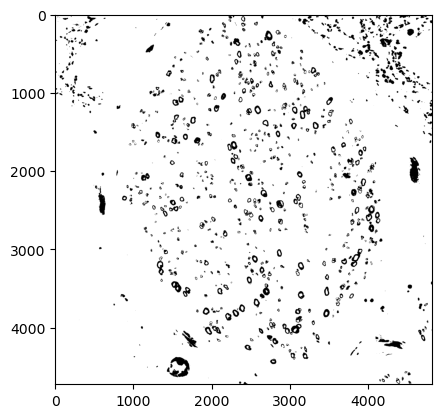

In [4]:
plt.imshow(gray,'gray')

# Systematic Patch Generation

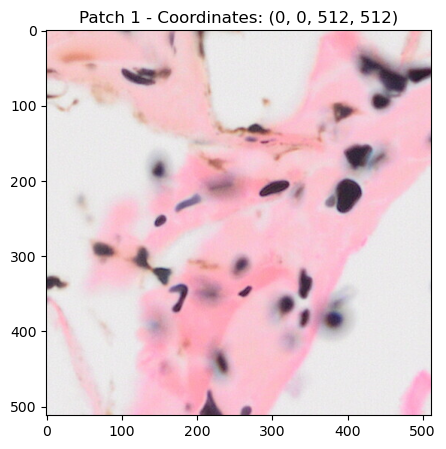

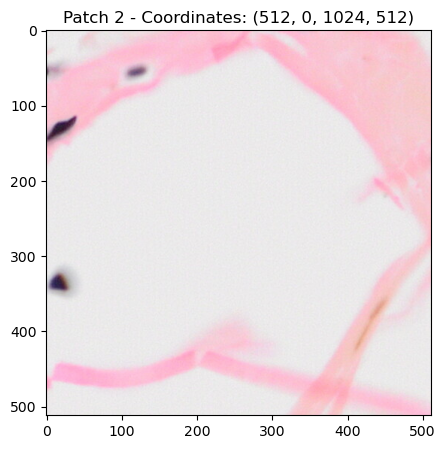

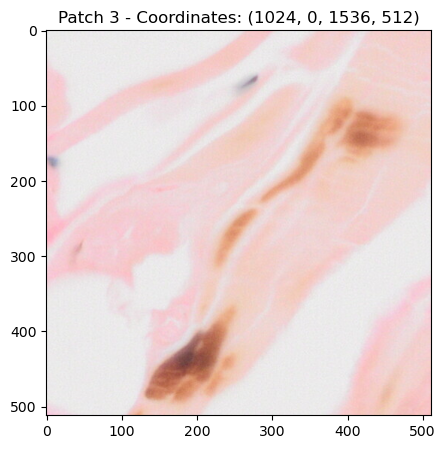

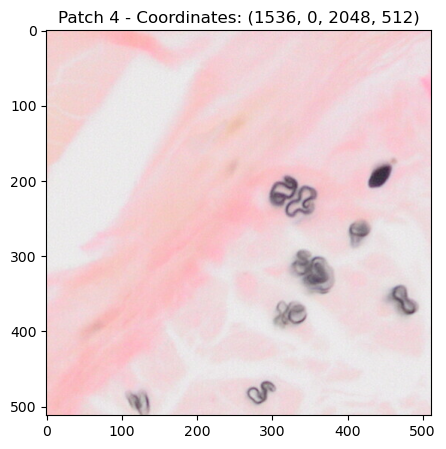

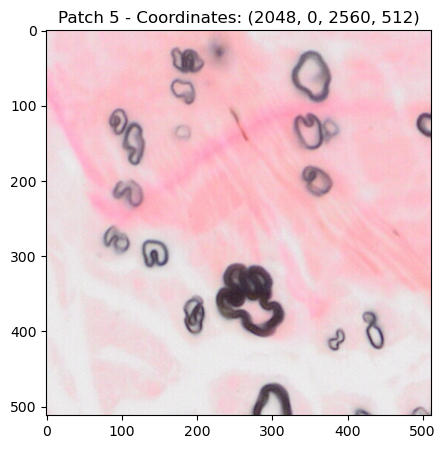

In [ ]:
# from PIL import Image
# import matplotlib.pyplot as plt

# # Load the image
# image_path = "data/set1_Image_01_40x_bf_02_fossicle.png"  # Update the path to your image
# image = Image.open(image_path)

# # Define patch size
# patch_width = 512  # Width of each patch
# patch_height = 512  # Height of each patch

# # Get the image dimensions
# image_width, image_height = image.size

# # Calculate the number of patches that fit horizontally and vertically
# num_patches_x = image_width // patch_width
# num_patches_y = image_height // patch_height

# # Create a list to store patches
# patches = []

# # Generate patches systematically
# for row in range(num_patches_y):
#     for col in range(num_patches_x):
#         # Define the top-left corner of the patch
#         x_start = col * patch_width
#         y_start = row * patch_height
        
#         # Define the bottom-right corner of the patch
#         x_end = x_start + patch_width
#         y_end = y_start + patch_height
        
#         # Crop the patch from the image
#         patch = image.crop((x_start, y_start, x_end, y_end))
        
#         # Append the patch and its coordinates to the list
#         patches.append({
#             "coordinates": (x_start, y_start, x_end, y_end),
#             "image": patch
#         })

# # Display the first 5 patches for verification
# for idx, patch_info in enumerate(patches[:5]):
#     patch_image = patch_info["image"]
#     coords = patch_info["coordinates"]
    
#     plt.figure(figsize=(5, 5))  # Adjust the figure size
#     plt.imshow(patch_image, cmap='gray')
#     plt.title(f"Patch {idx + 1} - Coordinates: {coords}")
#     plt.axis("on")
#     plt.show()
# # Save each patch as a PNG file


# Patch saving 

In [ ]:

# # Optional: Save patches as separate files
# for idx, patch_info in enumerate(patches):
#     patch_image = patch_info["image"]
#     patch_image.save(f"systematic_patch_{idx + 1}_{x_start}_{y_start}.png")  

# Manual Patch Generation

In [ ]:
# # Import necessary libraries
# from PIL import Image
# import matplotlib.pyplot as plt
# import cv2
# import numpy as np

# # Load the image from the notebook
# image_path = "data/set1_Image_01_40x_bf_02_fossicle.png"  # Update this if your image is stored separately

# # Open the image (update the file reading as per your stored image format)
# image = Image.open(image_path)

# # Define the coordinates for cropping
# x_start1, x_end1 = 1450, 1750
# y_start1, y_end1 = 2250, 2600

# # Crop the image to the desired patch
# patch1 = image.crop((x_start1, y_start1, x_end1, y_end1))

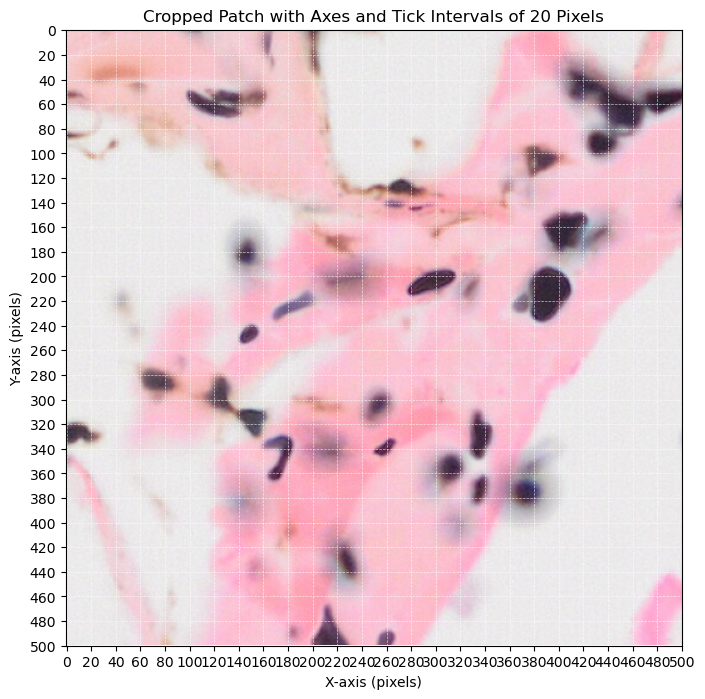

In [13]:
# Import necessary libraries
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np

# # Load the image from the notebook
# image_path = "data/set1_Image_01_40x_bf_02_fossicle.png"  # Update this if your image is stored separately

# # Open the image (update the file reading as per your stored image format)
# image = Image.open(image_path)

# # Define the coordinates for cropping
# x_start1, x_end1 = 1450, 1750
# y_start1, y_end1 = 2250, 2600

# Crop the image to the desired patch
# patch1 = image.crop((x_start1, y_start1, x_end1, y_end1))
num = 1
# patch_path =  
patch1 = Image.open(f"patches_512x512/systematic_patch_{num}.png")
# patch1 = patch1.crop((380,360,512,512))

# Convert the PIL Image to a NumPy array for OpenCV compatibility
patch_np = np.array(patch1)

# Convert from RGB to BGR for OpenCV
patch_bgr = cv2.cvtColor(patch_np, cv2.COLOR_RGB2BGR)

# Convert to grayscale
gray = cv2.cvtColor(patch_bgr, cv2.COLOR_BGR2GRAY)

# x_size = patch1.size[0]
# y_size = patch1.size[1]
# Set the tick intervals for every 20 pixels
x_ticks = np.arange(0,513,20)  # Tick positions for the x-axis
y_ticks = np.arange(0,513, 20)  # Tick positions for the y-axis

# Display the patch with axes
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
plt.imshow(patch1, cmap='gray')
plt.title("Cropped Patch with Axes and Tick Intervals of 20 Pixels")
plt.xlabel("X-axis (pixels)")
plt.ylabel("Y-axis (pixels)")
plt.axis("on")  # Turn on axes
plt.xticks(ticks=np.linspace(0, patch1.size[0], len(x_ticks)), labels=x_ticks)  # X-axis ticks
plt.yticks(ticks=np.linspace(0, patch1.size[1], len(y_ticks)), labels=y_ticks)  # Y-axis ticks
plt.grid(color='white', linestyle='--', linewidth=0.5, alpha=0.7)  # Optional grid for better visualization
plt.show()

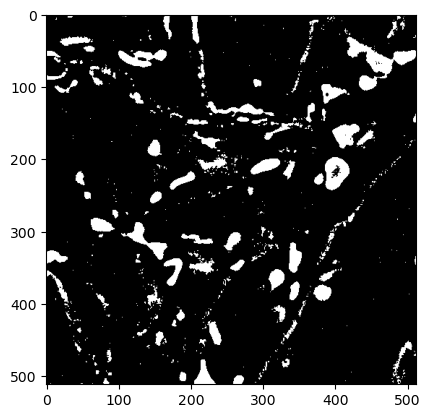

In [14]:
# _, thresholded = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)

thresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,35,6)
# distance_transform = cv2.distanceTransform(thresholded, cv2.DIST_L2, 5)

# _,sure_fg = cv2.threshold(distance_transform, 0.05 * distance_transform.max(), 255, 0)
# sure_fg = np.uint8(sure_fg)

plt.imshow(thresh,'gray')

90.0
Subplots saved to results/rbc


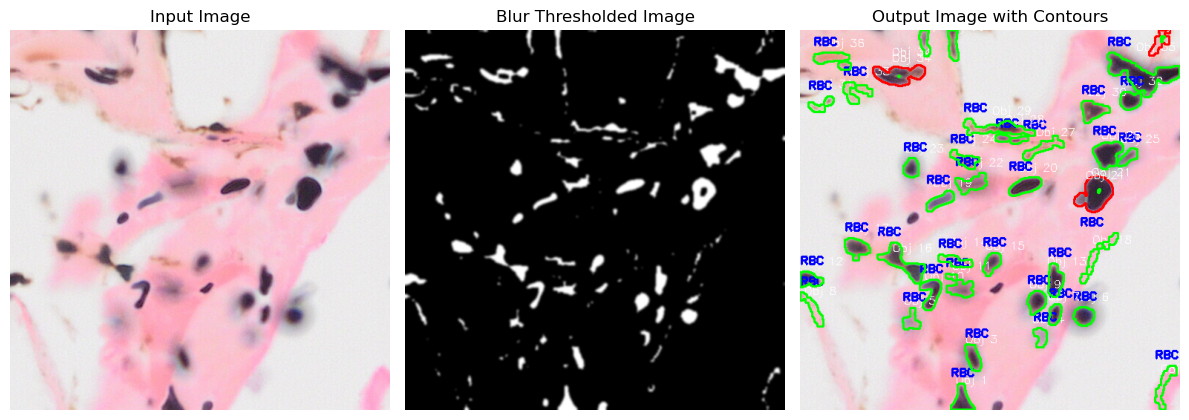

Object 1:
  Center = 219.00 , 496.80
  Outer Radius = 2.9094 micro meters
 Diameter = 5.8188 micro meters
  Inner Radius = 0.0000 micro meters
  Thickness = 2.9094 micro meters

Object 2:
  Center = 495.00 , 481.50
  Outer Radius = 4.2363 micro meters
 Diameter = 8.4725 micro meters
  Inner Radius = 0.0000 micro meters
  Thickness = 4.2363 micro meters

Object 3:
  Center = 232.50 , 441.00
  Outer Radius = 2.7072 micro meters
 Diameter = 5.4145 micro meters
  Inner Radius = 0.0000 micro meters
  Thickness = 2.7072 micro meters

Object 4:
  Center = 322.42 , 414.29
  Outer Radius = 1.8373 micro meters
 Diameter = 3.6746 micro meters
  Inner Radius = 0.0000 micro meters
  Thickness = 1.8373 micro meters

Object 5:
  Center = 149.82 , 389.54
  Outer Radius = 2.1885 micro meters
 Diameter = 4.3770 micro meters
  Inner Radius = 0.0000 micro meters
  Thickness = 2.1885 micro meters

Object 6:
  Center = 382.00 , 384.00
  Outer Radius = 1.9802 micro meters
 Diameter = 3.9604 micro meters
  In

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Apply morphological closing to fix gaps in the binary image
kernel = np.ones((3,3), np.uint8)  # Adjust kernel size if needed
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
kernel = np.ones((3, 3), np.uint8)
eroded_image = cv2.erode(closed, kernel, iterations=1) 
blurred = cv2.GaussianBlur(eroded_image, (7, 7), 0)

# plt.show()
contours, hierarchy = cv2.findContours(blurred, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# print(len(contours))
rbc = 0
# Create a copy of the binary image for visualization
output_image_bw = patch_np

# Define a minimum area to filter out noise
min_contour_area = 320 # Adjust as needed based on your image

# Object counter
object_counter = 1

# Data to store radii information
radii_data = []
directory_name = "direct"
# num_contours = len(contours)
num_outer_contours = 0
# Loop through contours to classify as inner or outer boundaries
for i, contour in enumerate(contours):
    # Filter out small contours
    if cv2.contourArea(contour) < min_contour_area:
        continue

    # Check if the contour is an outer boundary (no parent in the hierarchy)
    if hierarchy[0][i][3] == -1:  # Outer boundary
        # Calculate the outer radius
        (x_outer, y_outer), outer_radius = cv2.minEnclosingCircle(contour)

        # Draw the outer boundary in blue
        cv2.drawContours(output_image_bw, [contour], -1, (255, 0, 0), 2)  # Blue for outer
        # Add object number as label
        cv2.putText(output_image_bw, f"Obj {object_counter}", (int(x_outer) - 10, int(y_outer) - 20),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)

        # Look for corresponding inner boundary (child in the hierarchy)
        inner_radius = 0  # Default if no inner boundary is found
        # Initialize variables to store the largest child contour and its radius
        largest_inner_contour = None
        max_area = 0
        inner_radius = 0
        
        
        # Loop through all child contours to find the one with the largest area
        for j, child_contour in enumerate(contours):
            if hierarchy[0][j][3] == i:  # Check if the current contour is a child of the current outer contour
                # Calculate the area of the child contour
                area = cv2.contourArea(child_contour)
                if area > max_area:  # Update the largest contour if this one is larger
                    max_area = area
                    largest_inner_contour = child_contour
                    (x_inner, y_inner), inner_radius = cv2.minEnclosingCircle(child_contour)
        
        # After the loop, use the largest child contour (if found)
        if largest_inner_contour is not None:
            # Draw the inner boundary in green
            cv2.drawContours(output_image_bw, [largest_inner_contour], -1, (0, 255, 0), 2)  # Green for inner
            # Add the same object number to the inner boundary
            cv2.putText(output_image_bw, f"Obj {object_counter}", (int(x_inner) - 10, int(y_inner) - 20),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)
        else :
            x, y, w, h = cv2.boundingRect(contour)
            # Draw the contour
            cv2.drawContours(output_image_bw, [contour], -1, (0, 255, 0), 2)  # Green contour
            # Annotate with "RBC"
            cv2.putText(output_image_bw, "RBC", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)  
            rbc += 1
        # num_outer_contours += 1

        #calculate percentage of rbc's
        
        # Calculate thickness if both rdii exist
        thickness = outer_radius - inner_radius
        scale_factor = 0.136
        # radii_data.append((object_counter, outer_radius*scale_factor, inner_radius*scale_factor, thickness*scale_factor,(x_outer,y_outer))
        diameter = 2*outer_radius
        # radii_data.append((object_counter, outer_radius, inner_radius, thickness))
        radii_data.append({
            "axon_id": object_counter,  # Unique ID for the axon
            "outer_radius": outer_radius * scale_factor,  # Outer radius scaled
            "inner_radius": inner_radius * scale_factor,  # Inner radius scaled
            "thickness": thickness * scale_factor,
            "diameter" : diameter*scale_factor,
            "center": (x_outer,y_outer)# Thickness scaled
        })
        # Increment the object counter for the next object
        object_counter += 1
percentage = (rbc/object_counter)*100
if(percentage > 70):
    directory_name = "rbc"
print(percentage)

fig, axes = plt.subplots(1, 3, figsize=(12, 8))

axes[ 0].imshow(patch1, cmap='gray')
axes[ 0].set_title("Input Image")
axes[ 0].axis('off')

axes[1].imshow(blurred, cmap='gray')
axes[ 1].set_title("Blur Thresholded Image")
axes[ 1].axis('off')

axes[2].imshow(output_image_bw)
axes[ 2].set_title("Output Image with Contours")
axes[2].axis('off')

plt.tight_layout()
plt.savefig(f'results/{directory_name}/output_image_dir_{num}', dpi=300)
print(f"Subplots saved to results/{directory_name}")
# plt.imshow(cv2.cvtColor(output_image_bw, cv2.COLOR_BGR2RGB))
# plt.title("Detected Objects with Inner and Outer Boundaries")
# plt.axis('off')
plt.show()

# Display the results with numbered objects
# plt.imshow(cv2.cvtColor(output_image_bw, cv2.COLOR_BGR2RGB))
# plt.title("Detected Objects with Inner and Outer Boundaries")
# plt.axis('off')
# plt.show()
for axon_data in radii_data:
    obj_id = axon_data["axon_id"]
    center = axon_data["center"]
    outer_radius = axon_data["outer_radius"]
    inner_radius = axon_data["inner_radius"]
    thickness = axon_data["thickness"]
    diameter = axon_data["diameter"]
    
    print(f"Object {obj_id}:")
    print(f"  Center = {center[0]:.2f} , {center[1]:.2f}")
    print(f"  Outer Radius = {outer_radius:.4f} micro meters")
    print(f" Diameter = {diameter:.4f} micro meters")
    print(f"  Inner Radius = {inner_radius:.4f} micro meters")
    print(f"  Thickness = {thickness:.4f} micro meters\n")




In [9]:
print(percentage)

29.629629629629626


# Sobel 

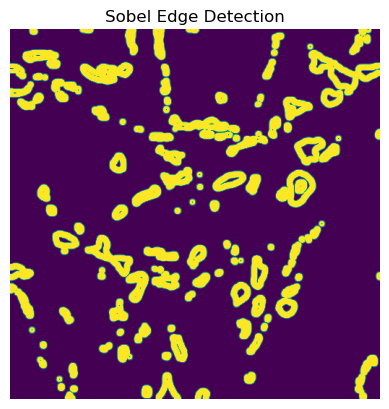

124
RBC percentage 54.347826086956516
Subplots saved to output


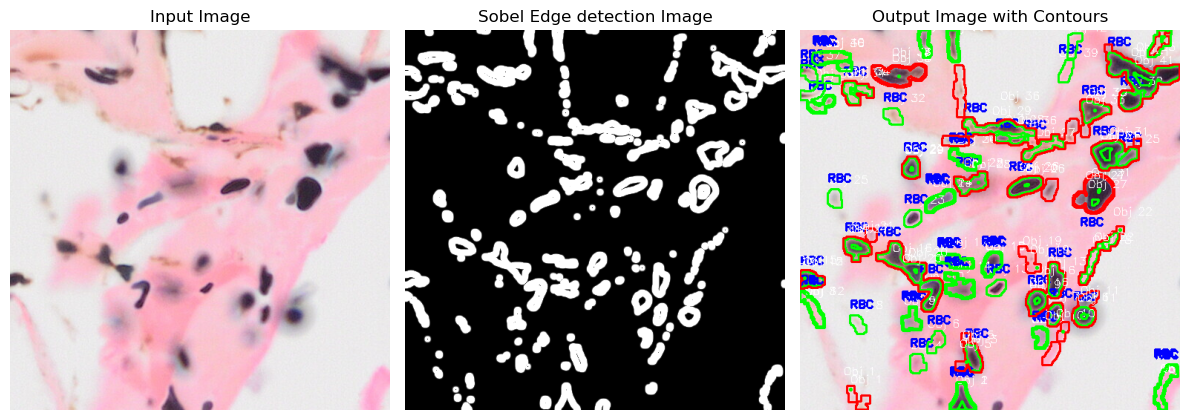

Object 1:
  Center = 77.50 , 495.00
  Outer Radius = 2.8471 micro meters
  Inner Radius = 0.1360 micro meters
  Thickness = 2.7111 micro meters

Object 2:
  Center = 219.00 , 496.22
  Outer Radius = 3.1679 micro meters
  Inner Radius = 0.0000 micro meters
  Thickness = 3.1679 micro meters

Object 3:
  Center = 494.50 , 480.50
  Outer Radius = 4.4829 micro meters
  Inner Radius = 0.0000 micro meters
  Thickness = 4.4829 micro meters

Object 4:
  Center = 158.01 , 449.06
  Outer Radius = 1.9555 micro meters
  Inner Radius = 0.0000 micro meters
  Thickness = 1.9555 micro meters

Object 5:
  Center = 228.70 , 435.35
  Outer Radius = 3.9941 micro meters
  Inner Radius = 0.1360 micro meters
  Thickness = 3.8581 micro meters

Object 6:
  Center = 181.00 , 420.00
  Outer Radius = 2.3790 micro meters
  Inner Radius = 0.0000 micro meters
  Thickness = 2.3790 micro meters

Object 7:
  Center = 321.81 , 414.53
  Outer Radius = 2.1966 micro meters
  Inner Radius = 0.0000 micro meters
  Thickness = 

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Apply morphological closing to fix gaps in the binary image
kernel = np.ones((3,3), np.uint8)  # Adjust kernel size if needed
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
kernel = np.ones((3, 3), np.uint8)
eroded_image = cv2.erode(closed, kernel, iterations=1) 
blurred = cv2.GaussianBlur(eroded_image, (7, 7), 0)
# _, binary_image = cv2.threshold(eroded_image, 127, 255, cv2.THRESH_BINARY)
# edges = cv2.Canny(binary_image, 127, 255)
sobel_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=5)  # X direction
sobel_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=5)  # Y direction

# Compute the gradient magnitude
sobel_combined = cv2.magnitude(sobel_x, sobel_y)

# Convert to 8-bit for visualization
sobel_combined = cv2.convertScaleAbs(sobel_combined)

plt.imshow(sobel_combined)
plt.title("Sobel Edge Detection")
plt.axis("off")
plt.show()
contours, hierarchy = cv2.findContours(sobel_combined, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

print(len(contours))
# Create a copy of the binary image for visualization
output_image_bw = patch_np

# Define a minimum area to filter out noise
min_contour_area = 320 # Adjust as needed based on your image

# Object counter
object_counter = 1

# Data to store radii information
radii_data = []
rbc = 0
directory_name = "sobel"
# Loop through contours to classify as inner or outer boundaries
for i, contour in enumerate(contours):
    # Filter out small contours
    if cv2.contourArea(contour) < min_contour_area:
        continue

    # Check if the contour is an outer boundary (no parent in the hierarchy)
    if hierarchy[0][i][3] == -1:  # Outer boundary
        # Calculate the outer radius
        (x_outer, y_outer), outer_radius = cv2.minEnclosingCircle(contour)

        # Draw the outer boundary in blue
        cv2.drawContours(output_image_bw, [contour], -1, (255, 0, 0), 2)  # Blue for outer
        # Add object number as label
        cv2.putText(output_image_bw, f"Obj {object_counter}", (int(x_outer) - 10, int(y_outer) - 20),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)

        # Look for corresponding inner boundary (child in the hierarchy)
        inner_radius = 0  # Default if no inner boundary is found
        # Initialize variables to store the largest child contour and its radius
        largest_inner_contour = None
        max_area = 0
        inner_radius = 0
        
        # Loop through all child contours to find the one with the largest area
        for j, child_contour in enumerate(contours):
            if hierarchy[0][j][3] == i:  # Check if the current contour is a child of the current outer contour
                # Calculate the area of the child contour
                area = cv2.contourArea(child_contour)
                if area > max_area:  # Update the largest contour if this one is larger
                    max_area = area
                    largest_inner_contour = child_contour
                    (x_inner, y_inner), inner_radius = cv2.minEnclosingCircle(child_contour)
        
        # After the loop, use the largest child contour (if found)
        if largest_inner_contour is not None:
            # Draw the inner boundary in green
            cv2.drawContours(output_image_bw, [largest_inner_contour], -1, (0, 255, 0), 2)  # Green for inner
            # Add the same object number to the inner boundary
            cv2.putText(output_image_bw, f"Obj {object_counter}", (int(x_inner) - 10, int(y_inner) - 20),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)
        else :
            x, y, w, h = cv2.boundingRect(contour)

            # Draw the contour
            cv2.drawContours(output_image_bw, [contour], -1, (0, 255, 0), 2)  # Green contour

            # Annotate with "RBC"
            cv2.putText(output_image_bw, "RBC", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)  
            rbc += 1
        # Calculate thickness if both rdii exist
        thickness = outer_radius - inner_radius
        scale_factor = 0.136
        # radii_data.append((object_counter, outer_radius*scale_factor, inner_radius*scale_factor, thickness*scale_factor,(x_outer,y_outer)))
        

# Sample code to append data (modify the actual implementation accordingly)
        # radii_data.append({
        #     "axon_id": object_counter,  # Unique ID for the axon
        #     "outer_radius": outer_radius * scale_factor,  # Outer radius scaled
        #     "inner_radius": inner_radius * scale_factor,  # Inner radius scaled
        #     "thickness": thickness * scale_factor,
        #     "center": (x_outer,y_outer)# Thickness scaled
        # })
        diameter = 2*outer_radius
        radii_data.append({
            "axon_id": object_counter,  # Unique ID for the axon
            "outer_radius": outer_radius * scale_factor,  # Outer radius scaled
            "inner_radius": inner_radius * scale_factor,  # Inner radius scaled
            "thickness": thickness * scale_factor,
            "diameter" : diameter,
            "center": (x_outer,y_outer)# Thickness scaled
        })
        # Increment the object counter for the next object
        object_counter += 1

percentage = (rbc/object_counter)*100
if(percentage > 70):
    directory_name = "rbc"
print(f"RBC percentage {percentage}")
fig, axes = plt.subplots(1, 3, figsize=(12, 8))

axes[ 0].imshow(patch1, cmap='gray')
axes[ 0].set_title("Input Image")
axes[ 0].axis('off')

axes[1].imshow(sobel_combined, cmap='gray')
axes[ 1].set_title("Sobel Edge detection Image")
axes[ 1].axis('off')

axes[2].imshow(output_image_bw)
axes[ 2].set_title("Output Image with Contours")
axes[2].axis('off')

plt.tight_layout()
output_dir = "results/" + directory_name
if not os.path.exists(output_dir):
        os.makedirs(output_dir)
plt.savefig(f'{output_dir}/output_image_sobel_{num}', dpi=300)
print(f"Subplots saved to {output_dir}")
# plt.imshow(cv2.cvtColor(output_image_bw, cv2.COLOR_BGR2RGB))
# plt.title("Detected Objects with Inner and Outer Boundaries")
# plt.axis('off')
plt.show()
for axon_data in radii_data:
    obj_id = axon_data["axon_id"]
    center = axon_data["center"]
    outer_radius = axon_data["outer_radius"]
    inner_radius = axon_data["inner_radius"]
    thickness = axon_data["thickness"]
    
    print(f"Object {obj_id}:")
    print(f"  Center = {center[0]:.2f} , {center[1]:.2f}")
    print(f"  Outer Radius = {outer_radius:.4f} micro meters")
    print(f"  Inner Radius = {inner_radius:.4f} micro meters")
    print(f"  Thickness = {thickness:.4f} micro meters\n")



# CANNY

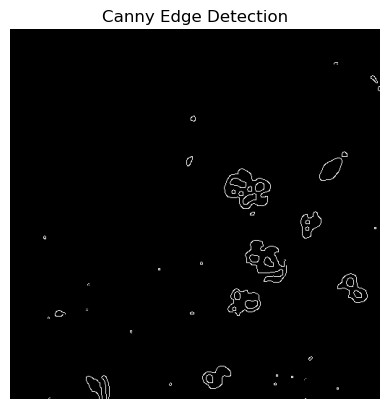

96
705.5
childs687.0
836.5
childs819.5
619.5
childs602.5
2214.5
childs2181.5
616.5
childs603.5


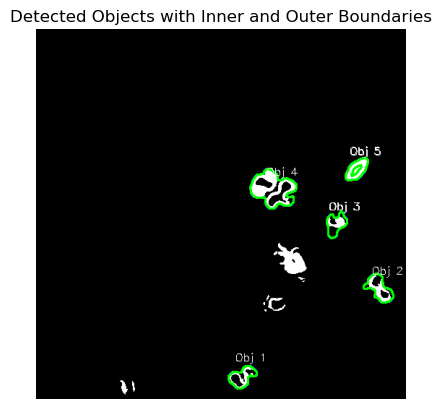

Object 1:
  Center = 285.54 , 479.15
  Outer Radius = 2.7379 micro meters
  Inner Radius = 2.7379 micro meters
  Thickness = 0.0000 micro meters

Object 2:
  Center = 474.86 , 359.86
  Outer Radius = 3.0459 micro meters
  Inner Radius = 3.0299 micro meters
  Thickness = 0.0160 micro meters

Object 3:
  Center = 414.50 , 270.50
  Outer Radius = 2.7149 micro meters
  Inner Radius = 2.6901 micro meters
  Thickness = 0.0248 micro meters

Object 4:
  Center = 328.28 , 222.38
  Outer Radius = 4.4297 micro meters
  Inner Radius = 4.4217 micro meters
  Thickness = 0.0080 micro meters

Object 5:
  Center = 444.00 , 194.00
  Outer Radius = 2.7905 micro meters
  Inner Radius = 2.7081 micro meters
  Thickness = 0.0824 micro meters



In [ ]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt

# # Apply morphological closing to fix gaps in the binary image
# kernel = np.ones((5,5), np.uint8)  # Adjust kernel size if needed
# closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
# # Convert to binary image if needed (thresholding)


# # Step 1: Detect edges using the Canny edge detector
# #
# # plt.imshow(edges, cmap='gray')
# # plt.title('Detected Edges')
# # plt.axis('off')
# # plt.show()
# # Kernel size (5x5); adjust as needed

# # Apply erosion
# # kernel = np.ones((3, 3), np.uint8)
# # eroded_image = cv2.erode(closed, kernel, iterations=1) 
# blurred = cv2.GaussianBlur(closed, (5, 5), 0)
# _, binary_image = cv2.threshold(blurred, 127, 255, cv2.THRESH_BINARY)
# edges = cv2.Canny(binary_image, 127, 255)

# # kernel = np.ones((5, 5), np.uint8) 
# # dilated = cv2.dilate(edges,kernel)
# # Adjust the size as needed based on the image
# # Apply morphological closing (dilation followed by erosion)

# # # Display the result
# plt.imshow(edges, cmap='gray')
# plt.title("Canny Edge Detection")
# plt.axis("off")
# plt.show()
# # Find contours and hierarchy using the closed binary image
# contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# print(len(contours))
# # Create a copy of the binary image for visualization
# output_image_bw = cv2.cvtColor(thresholded, cv2.COLOR_GRAY2BGR)

# # Define a minimum area to filter out noise
# min_contour_area =200 # Adjust as needed based on your image

# # Object counter
# object_counter = 1

# # Data to store radii information
# radii_data = []

# # Loop through contours to classify as inner or outer boundaries
# for i, contour in enumerate(contours):
#     # Filter out small contours
#     if cv2.contourArea(contour) < min_contour_area:
#         continue

#     # Check if the contour is an outer boundary (no parent in the hierarchy)
#     if hierarchy[0][i][3] == -1:  # Outer boundary
#         # Calculate the outer radius
#         print(cv2.contourArea(contour))
#         (x_outer, y_outer), outer_radius = cv2.minEnclosingCircle(contour)

#         # Draw the outer boundary in blue
#         cv2.drawContours(output_image_bw, [contour], -1, (255, 0, 0), 2)  # Blue for outer
#         # Add object number as label
#         cv2.putText(output_image_bw, f"Obj {object_counter}", (int(x_outer) - 10, int(y_outer) - 20),
#                     cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)

#         # Look for corresponding inner boundary (child in the hierarchy)
#         inner_radius = 0
#         for j, child_contour in enumerate(contours):
#             if hierarchy[0][j][3] == i:  # Check if the current contour is a child
#                 (x_inner, y_inner), inner_radius = cv2.minEnclosingCircle(child_contour)
#                 print("childs" + str(cv2.contourArea(child_contour)))
#                 # Draw the inner boundary in green
#                 cv2.drawContours(output_image_bw, [child_contour], -1, (0, 255, 0), 2)  # Green for inner
#                 # Add the same object number to the inner boundary
#                 cv2.putText(output_image_bw, f"Obj {object_counter}", (int(x_inner) - 10, int(y_inner) - 20),
#                             cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)
#                 break 
#         # max_area = 100000
#         # largest_inner_contour = None
#         # for j, child_contour in enumerate(contours):
#         #     if hierarchy[0][j][3] == i:  # Check if the current contour is a child of the current outer contour
#         #     # Calculate the area of the child contour
#         #         area = cv2.contourArea(child_contour)
#         #         print("child_contour_area" + str(area))
#         #         if area < max_area:  # Update the largest contour if this one is larger
#         #             max_area = area
#         #             largest_inner_contour = child_contour
#         #             (x_inner, y_inner), inner_radius = cv2.minEnclosingCircle(child_contour)

#         # After the loop, use the largest child contour (if found)
#         if largest_inner_contour is not None:
#             # Draw the inner boundary in green
#             cv2.drawContours(output_image_bw, [largest_inner_contour], -1, (0, 255, 0), 2)  # Green for inner
#             # Add the same object numbe

#         # Calculate thickness if both radii exist
#         thickness = outer_radius - inner_radius
#         scale_factor = 0.136
#         # radii_data.append((object_counter, outer_radius*scale_factor, inner_radius*scale_factor, thickness*scale_factor,(x_outer,y_outer)))
        

# # Sample code to append data (modify the actual implementation accordingly)
#         radii_data.append({
#             "axon_id": object_counter,  # Unique ID for the axon
#             "outer_radius": outer_radius * scale_factor,  # Outer radius scaled
#             "inner_radius": inner_radius * scale_factor,  # Inner radius scaled
#             "thickness": thickness * scale_factor,
#             "center": (x_outer,y_outer)# Thickness scaled
#         })
#         # Increment the object counter for the next object
#         object_counter += 1

# # Display the results with numbered objects
# plt.imshow(cv2.cvtColor(output_image_bw, cv2.COLOR_BGR2RGB))
# plt.title("Detected Objects with Inner and Outer Boundaries")
# plt.axis('off')
# plt.show()

# # Print the outer radius, inner radius, and thickness for each object
# # for obj_id, outer_radius, inner_radius, thickness, _ in radii_data:
# #     print(f"Object {obj_id}:")
# #     print(f"  Outer Radius = {outer_radius:.4f} micro meters")
# #     print(f"  Inner Radius = {inner_radius:.4f} micro meters")
# #     print(f"  Thickness = {thickness:.4f} micro meters\n")
# for axon_data in radii_data:
#     obj_id = axon_data["axon_id"]
#     center = axon_data["center"]
#     outer_radius = axon_data["outer_radius"]
#     inner_radius = axon_data["inner_radius"]
#     thickness = axon_data["thickness"]
    
#     print(f"Object {obj_id}:")
#     print(f"  Center = {center[0]:.2f} , {center[1]:.2f}")
#     print(f"  Outer Radius = {outer_radius:.4f} micro meters")
#     print(f"  Inner Radius = {inner_radius:.4f} micro meters")
#     print(f"  Thickness = {thickness:.4f} micro meters\n")



# Tkinter illustration

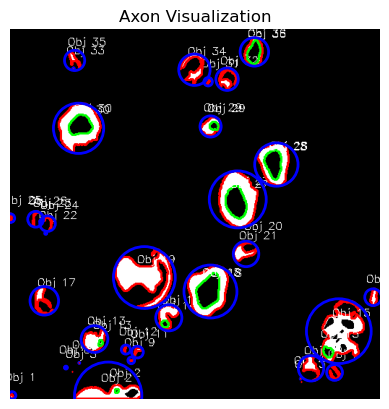

In [ ]:
# import matplotlib.pyplot as plt
# from matplotlib.patches import Circle
# from matplotlib.text import Annotation
# import numpy as np

# # Example axon data


# # Load your image
# # image = np.zeros((500, 500, 3), dtype=np.uint8)  # Replace with your actual image data

# # Create a figure and axis
# fig, ax = plt.subplots()
# ax.imshow(output_image_bw)

# # Create circles for each axon and store annotations
# circles = []
# annotations = []

# for axon in radii_data:
#     axon_id = axon["axon_id"]
#     x, y = axon["center"]
#     outer_radius = axon["outer_radius"]
#     thickness = axon["thickness"]

#     # Add a circle to represent the axon
#     circle = Circle((x, y), outer_radius/scale_factor, color="blue", fill=False, linewidth=2)
#     ax.add_patch(circle)
#     circles.append(circle)

#     # Add an annotation for this axon
#     annotation_text = (
#         f"Axon ID: {axon_id}\n"
#         f"Outer Radius: {outer_radius:.4f} µm\n"
#         f"Thickness: {thickness:.4f} µm\n"
#         f"Diameter : {diameter:.4f} µm"
#     )
#     annotation = Annotation(
#         annotation_text,
#         (x, y),
#         xytext=(x + 10, y - 10),
#         textcoords="offset points",
#         bbox=dict(boxstyle="round", fc="yellow", alpha=0.8),
#         arrowprops=dict(arrowstyle="->", color="black"),
#         fontsize=10,
#         visible=False,
#         color="black",  # Text color
#     )
#     ax.add_artist(annotation)
#     annotations.append(annotation)

# # Callback for mouse movement
# def on_hover(event):
#     for circle, annotation in zip(circles, annotations):
#         contains, _ = circle.contains(event)
#         if contains:
#             annotation.set_visible(True)
#         else:
#             annotation.set_visible(False)
#     fig.canvas.draw_idle()

# # Connect the hover event
# fig.canvas.mpl_connect("motion_notify_event", on_hover)

# # Display the plot
# plt.axis("off")
# plt.title("Axon Visualization")
# plt.show()


In [ ]:
from tkinter import Tk, Canvas, Toplevel, Label, PhotoImage
# 

In [ ]:
import tkinter as tk
from tkinter import messagebox
import cv2
import numpy as np
from PIL import Image, ImageTk

In [ ]:
root = tk.Tk()
root.title("Axon Visualization")

# Create a canvas to draw the axons
canvas = tk.Canvas(root, width=1000, height=1000)
canvas.pack()


# Draw axons (outer and inner circles) on the image
for axon in radii_data:
    x, y = axon["center"]
    outer_radius = axon["outer_radius"]
    inner_radius = axon["inner_radius"]
output_image_bw_rgb = cv2.cvtColor(output_image_bw, cv2.COLOR_BGR2RGB)
image_pil = Image.fromarray(output_image_bw_rgb)
image_tk = ImageTk.PhotoImage(image_pil)

# Create a label to display the image
canvas.create_image(0, 0, anchor=tk.NW, image=image_tk)

# Function to check if mouse is inside any axon's outer 
def on_mouse_move(event):
    for axon in radii_data:
        axon_id = axon["axon_id"]
        x, y = axon["center"]
        outer_radius = axon["outer_radius"]

        # Check if the mouse cursor is inside the outer circle
        if (event.x - x) ** 2 + (event.y - y) ** 2 <= outer_radius ** 2:
            # Show a dialog with axon info when inside the outer circle
            messagebox.showinfo(
                "Axon Info",
                f"Axon ID: {axon_id}\n"
                f"Outer Radius: {outer_radius} µm\n"
                f"Inner Radius: {axon['inner_radius']} µm\n"
                f"Diameter: {axon['diameter']} µm \n"
                f"Thickness: {axon['thickness']} µm",
            )
            break  # Display info for only one axon at a time (if multiple axons)

# Bind the mouse motion to the on_mouse_move function
canvas.bind("<Motion>", on_mouse_move)

# Run the Tkinter event loop
root.mainloop()